In [1]:
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
import easyocr
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import gradio as gr

In [4]:
image = "C:/Users/User/Desktop/Untitled Folder/receipt_chinese.jpg"

In [5]:
def read_easyocr(image):
    reader = easyocr.Reader(['ko','en'])
    results = reader.readtext(image)
    return results

In [24]:
def read_pytesseract(image):
    results = pytesseract.image_to_string(image, lang='kor')
    return results

In [7]:
# 필터 적용해주기
def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

In [8]:
path = "C:/Users/User/Desktop/Untitled Folder/receipt_chinese.jpg"

In [10]:
os.path.isfile(path)

True

In [11]:
from PIL import Image, ExifTags

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


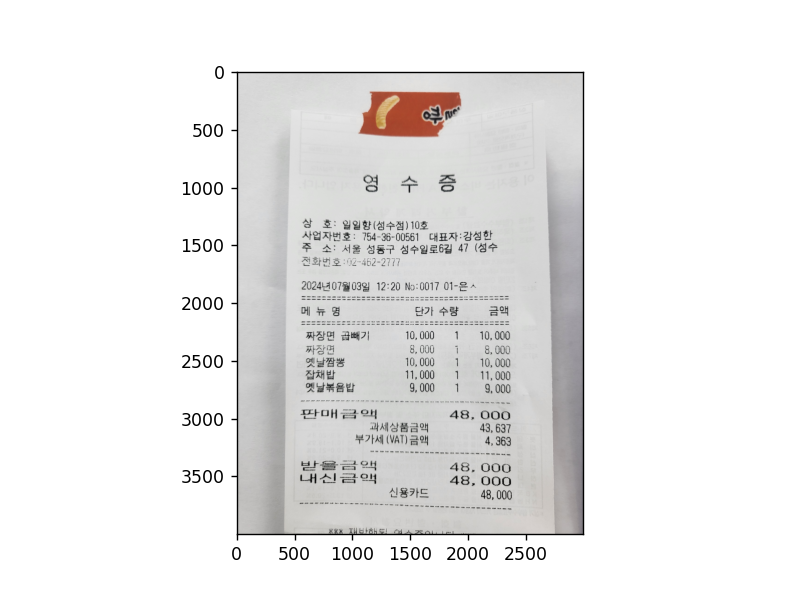

In [13]:
# Pillow를 사용하여 이미지 로드 및 방향 수정
pil_image = Image.open(path)

# EXIF 데이터를 사용하여 이미지 방향 수정
try:
    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    exif = pil_image._getexif()
    if exif is not None:
        orientation = exif[orientation]
        if orientation == 3:
            pil_image = pil_image.rotate(180, expand=True)
        elif orientation == 6:
            pil_image = pil_image.rotate(270, expand=True)
        elif orientation == 8:
            pil_image = pil_image.rotate(90, expand=True)
except (AttributeError, KeyError, IndexError):
    # EXIF 데이터가 없거나 처리 중 오류가 발생한 경우는 그대로 진행
    pass

pil_image = pil_image.convert('RGB')  # RGB로 변환
image = np.array(pil_image)  # 이미지를 numpy 배열로 변환

# 마우스 클릭 이벤트 처리 함수
def onclick(event):
    x, y = event.xdata, event.ydata
    print(f"x: {int(x)}, y: {int(y)}")

# 이미지 표시
fig, ax = plt.subplots()
ax.imshow(image)

# 클릭 이벤트 연결
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

(4000, 3000, 3)


<IPython.core.display.Javascript object>


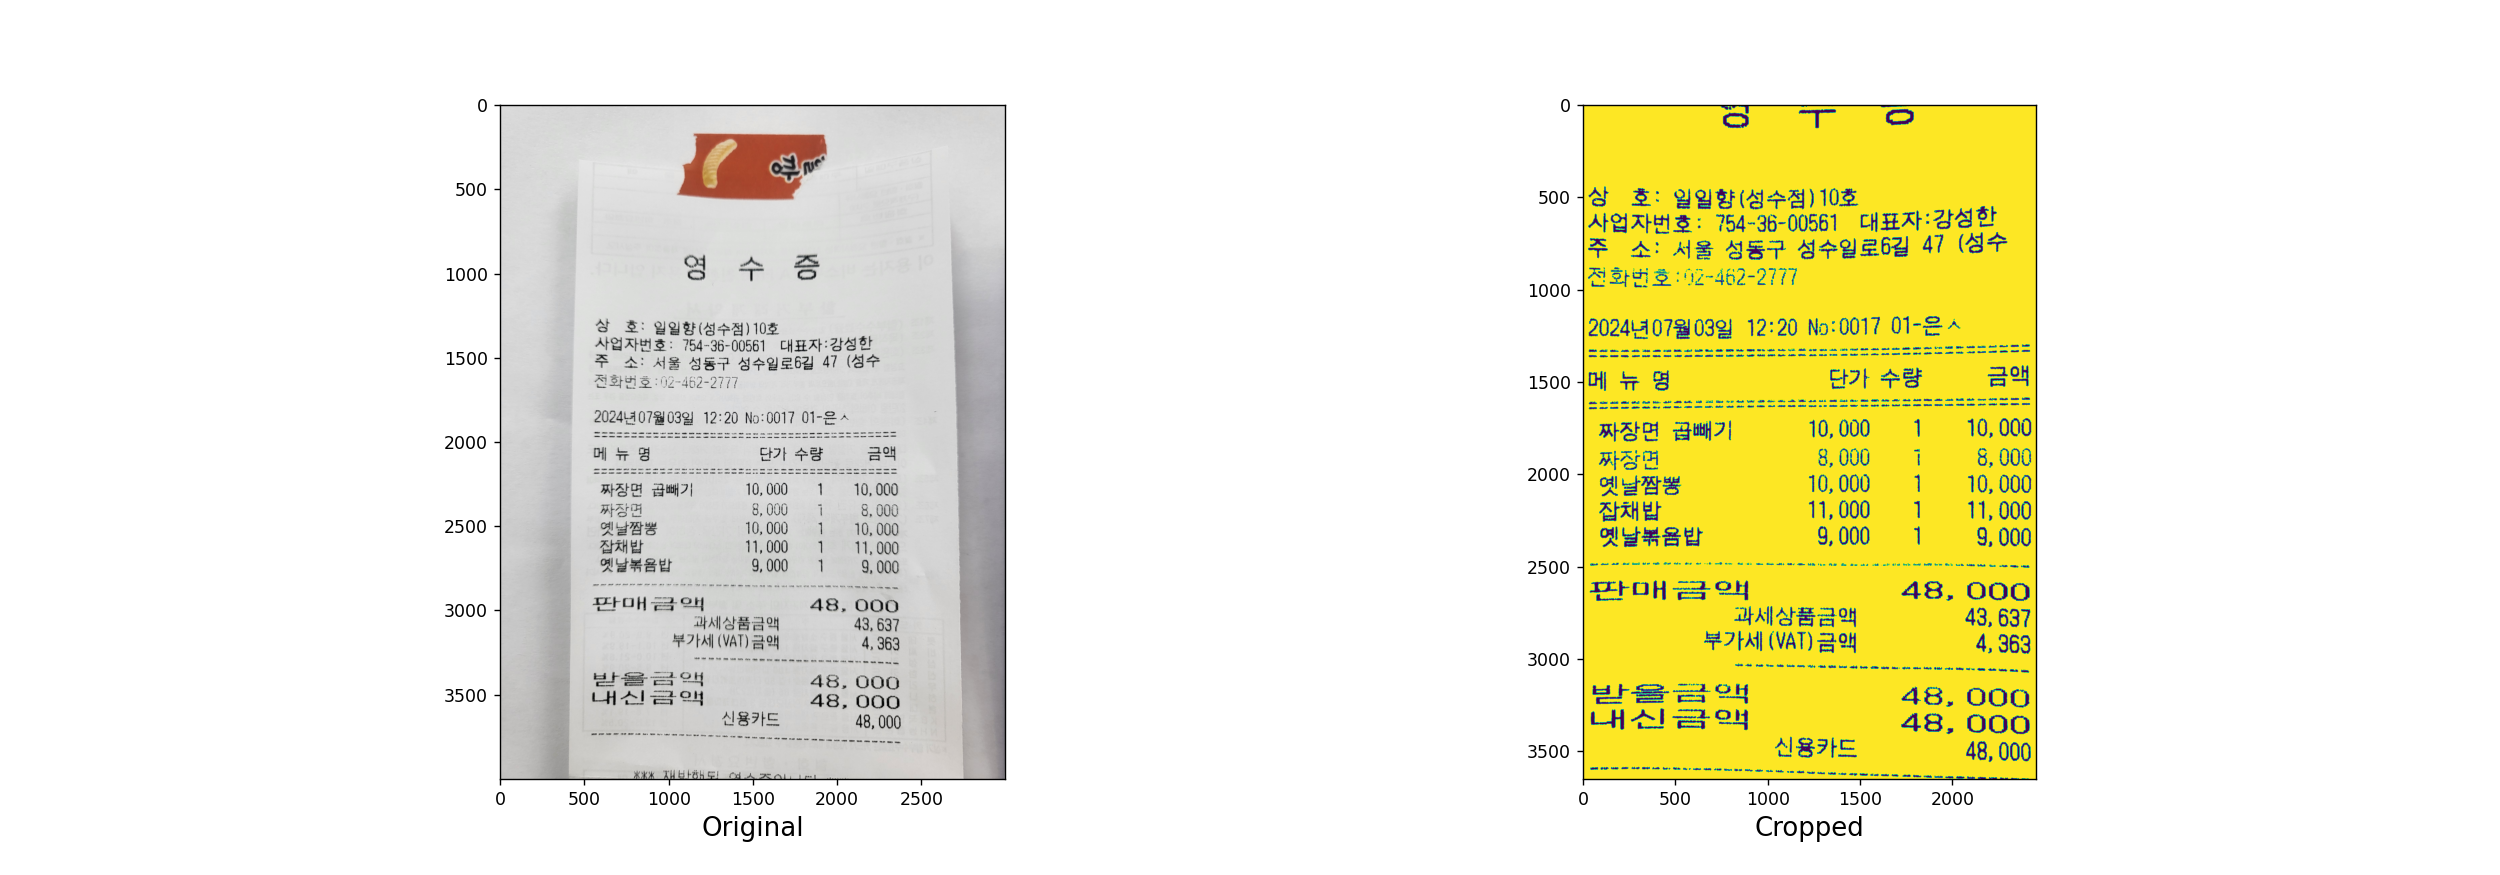

Text(0.5, 0, 'Original')

In [15]:
# Image Load (BGR)
image = cv2.imread(path) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

plt.figure(figsize = [20, 7])
plt.subplot(1,2,1)
plt.imshow(image)
plt.xlabel("Original", fontsize = 15)

(4000, 3000, 3)


<IPython.core.display.Javascript object>


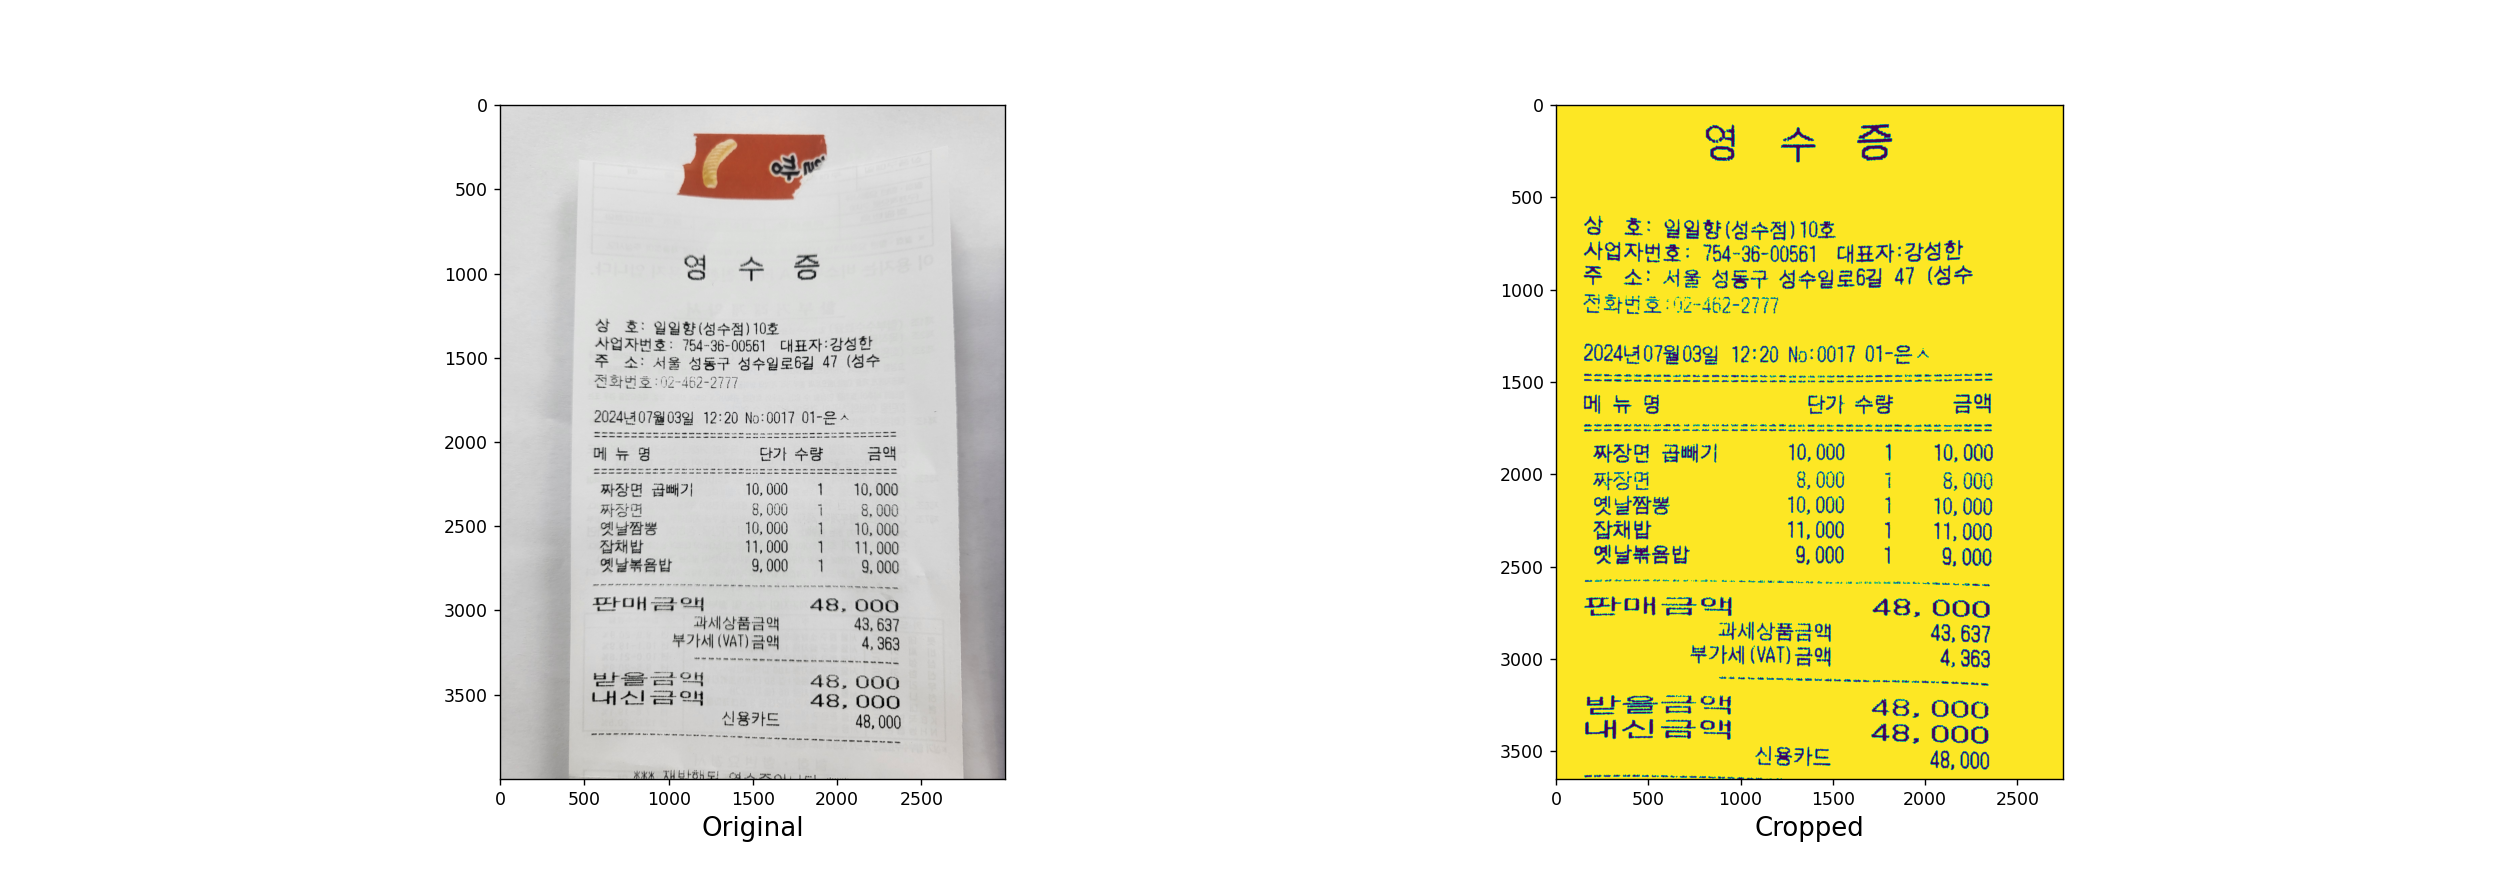

(3650, 2750)
uint8
ROI (x, y, w, h) :  (0, 150, 2750, 3800)
ROI (x, y, w, h) :  (0, 150, 2750, 3800)


In [21]:
# Image Load (BGR)
image = cv2.imread(path)  # image size (9248, 6936, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

plt.figure(figsize = [20, 7])
plt.subplot(1,2,1)
plt.imshow(image)
plt.xlabel("Original", fontsize = 15)

x1, y1 = 455, 696
x2, y2 = 2623, 696
x3, y3 = 412, 3747
x4, y4 = 2717, 3747

# 원래 이미지에서 차지하는 부분 좌표
src_points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

# 결과 이미지에서 원래 이미지 크기 그대로 자르기 위한 좌표
dst_points = np.float32([[0, 0], [2750, 0], [0, 3800], [2750, 3800]])

# 변환 매트릭스
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 이미지 변환
transformed_image = cv2.warpPerspective(image, M, (2750, 3800))

getROI = (0, 150, 2750, 3800) # (x, y, w, h)

# 자르기
cropped_image = transformed_image[getROI[1]:getROI[1]+getROI[3], getROI[0]:getROI[0]+getROI[2]]


# 세피아 필터 적용해서 결과 확인해보기
img = sepia(cropped_image)
# 이미지 정규화
img = cv2.normalize(cropped_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img = img.astype('uint8')

# 이미지 shape 수정
img = np.squeeze(img)

# 필터
# 이미지 이진화
# 미디안 블러를 적용하여 이미지 노이즈 제거
blurred = cv2.medianBlur(cropped_image, 3)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
thresh, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(binary.shape)
print(binary.dtype)


plt.subplot(1,2,2)
plt.imshow(binary)
plt.xlabel("Cropped", fontsize = 15)
print("ROI (x, y, w, h) : ", getROI)

plt.subplot(1,2,2)
plt.imshow(binary)
plt.xlabel("Cropped", fontsize = 15)
print("ROI (x, y, w, h) : ", getROI)

In [22]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [25]:
# tesseract
text = read_pytesseract(binary)
print(text)

. 스 . 소
령 수 승

항 호 : 일 일 향 ( 성 수 점 )10 호

사 업 자 번 호 : 754-36-00561 대 표 자 : 강 성 한
주 소 : 서 울 성 동 구 성 수 일 로 6 길 47 ( 성 수
신 화 번 호 :')2-462-2777

2024 년 07 월 먼 일 12:20 40:0017 01- 은 ㅅ

* 새 - 스 애 내 그 메 이시
1 ㅡ … -ｌ: 더 18302 니내 아 소 파 . 퍼 = 의 다 대 배 티 이2 7 트 니 . 4201 태 댄 레 니 니 매 터 그 1 쇠 느 니 . 2842 안 20 . 빈 이 26 14 니 닌 -2 우 /4 리 내 즈 -2 니 느 4-2 25 새련 라 10 녀 시 표 시 사 . 20205 더 220 이 . 씨 터 그 세 나나

ㅡㅡ ~/｜ 』 토티
___-백벽_뻬~~~_뻬펭뻬-뻬뻑쑤뻬“뼈_-)뻬_썩“~쇄뿍_"*뻬-락쎄“"

메 뉴 명 단 가 수 량 금 액
짜 장 면 곱 빼 기 100001 。 10, 000
짜 장 면 8, 000 . 1 . 8,000
옛 날 짱 10, 000 ㅣ 。 10,000
잡 채 밥 11, 000 . ㅣ _ 11, 000
옛 날 볶 음 밥 9, 000 ㅣ 。 9,000

딴 매 금 액 48, 000

과 세 상 품 금 액 43, 637

부 가 세 (/1) 금 액 4, 363

밭 을 금 액 48, 000
내 고 금 엑 9 4.8, 000
신 용 카드 48, 000



In [29]:
reader = easyocr.Reader(['ko'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [30]:
easyocr_text = reader.readtext(binary)

In [32]:
easyocr_text

[([[772, 79], [1063, 79], [1063, 319], [772, 319]], '영', 0.9998565963661896),
 ([[1177, 77], [1842, 77], [1842, 333], [1177, 333]],
  '수  증',
  0.4558268748260808),
 ([[137, 580], [1530, 580], [1530, 761], [137, 761]],
  '상   호: 일일합 (섬수점) 10호',
  0.46178450030730284),
 ([[141, 720], [1425, 720], [1425, 883], [141, 883]],
  '사업자번호: 754-36-00561',
  0.4902506567586252),
 ([[1505, 712], [2221, 712], [2221, 888], [1505, 888]],
  '대표자:강성한',
  0.9835110843769443),
 ([[134, 845], [1777, 845], [1777, 1021], [134, 1021]],
  '주   소: 서울 성동구 성수일로6길',
  0.7109958134971744),
 ([[1815, 850], [2266, 850], [2266, 998], [1815, 998]],
  '47 (성수',
  0.9695369501760595),
 ([[132, 999], [1224, 999], [1224, 1170], [132, 1170]],
  "전화번호; '12-462-2777",
  0.21822583032832485),
 ([[132, 1275], [893, 1275], [893, 1428], [132, 1428]],
  '2024년07월03일',
  0.6461582420636977),
 ([[935, 1285], [2032, 1285], [2032, 1422], [935, 1422]],
  '12:20 |7: 0017 0-은 ^',
  0.27441080660680284),
 ([[154, 1443], [370, 1443], [370

In [31]:
for i, item in enumerate(easyocr_text):
    print(i, item[1])

0 영
1 수  증
2 상   호: 일일합 (섬수점) 10호
3 사업자번호: 754-36-00561
4 대표자:강성한
5 주   소: 서울 성동구 성수일로6길
6 47 (성수
7 전화번호; '12-462-2777
8 2024년07월03일
9 12:20 |7: 0017 0-은 ^
10 스포스-
11 "스'"둑-스스-:
12 그스
13 ~
14 러"
15 "
16 '쇼
17 "~-----~""츠"-----
18 메 뉴 명
19 단가 수량
20 금액
21 ;스:
22 씨}
23 '스
24 :
25 
26 요,
27 과:
28 그 4
29 소설
30 446
31 프스-스-"덧 품소프"
32 ~
33 ~스
34 ~
35 수
36 +?>
37 소1
38 훨
39 ~
40 -
41 도"<
42 "스-스스스-그스스-스-스스-로
43 짜장면
44 급빼기
45 10,000
46 10,000
47 짜장면
48 8,000
49 8, 00
50 옛날짝봉
51 10,000
52 }
53 10,000
54 잡채밥
55 11,000
56 11,000
57 옛날부음밥
58 9,000
59 9,000
60 -= 소설 '드 ~
61 - -
62   
63 나=
64 >4
65 <스
66 스
67 ::
68 ? _
69 4구
70 루 +
71 4귀
72 5'
73 1 ~-
74 1 )
75 '4
76 -:
77 {: :
78 스소
79 오:
80 }퍽
81 너'
82 도:
83 5 7
84 {
85 +대
86 소;
87 나
88 판매금액
89 48, 000
90 과세상문금액
91 43,637
92 부가세 (차47) 금액
93 4,363
94 4+
95 +
96 {#
97 사
98 '4
99 새4
100 비
101 결1
102 서
103 {{
104 나,
105 "사석
106 '; 
107 46
108 수사+
109 씨
110 {514
111 국
112 둘^
113 받올-금액
114 48. 000
115 내신금액
116 48, 000
117 신용카드
118 48,000
119 벌새
120 
121